# Project 1: SAT & ACT Analysis

## Problem Statement

In this project we were provided with SAT and ACT test data collected in 2017 and 2018 for 50 USA states plus District of Columbia. The goal was to look at the participation rates for each test. The question posed is: what actions can be taken to increase the participation amoung high school seniours in taking the SAT and ACT test before graduation.

## Executive Summary

By analysing the data, I have come to the conclusion that participation is highly dependent on the state by state requirement. For the states that require, for example, the student to take the SAT test, the participation is 100%. Same can be observed for the ACT participation. Interestingly, the SAT participation and the ACT participation are negatively correlated. This means that as one goes up the other goes down. 

As a side note, I also noticed that the scores and participation are negatively correlated as well. This could be a question to dive in to deeper in the future. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_scores_2017 = pd.read_csv('../data/sat_2017.csv')
act_scores_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_scores_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_scores_2017.tail(10)

,State,Participation,English,Math,Reading,Science,Composite
42,South Dakota,80%,20.7,21.5,22.3,22.0,21.8
43,Tennessee,100%,19.5,19.2,20.1,19.9,19.8
44,Texas,45%,19.5,20.7,21.1,20.9,20.7
45,Utah,100%,19.5,19.9,20.8,20.6,20.3
46,Vermont,29%,23.3,23.1,24.4,23.2,23.6
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The SAT data that we downloaded consists of 5 components for the year 2017. The State column lists the 50 USA states plus the District of Columbia. Then we have the column giving us the participation rate by state. In addition we have the Evidence-Based Reading and Writing column and Math column which provide the average scores respectfully. Last but not least, we have the Total column which provides the total Reading and Writing plus Math scores. 

For the ACT data, we again have the State column that list the 50 states plus the District of Columbia, and National. For each State we are provided with participation rate along with averages of the English, Math, Reading and Science scores. The Composite column gives us the average of English, Math, Reading and Science scores. 

#### 4a. Does the data look complete? 

The main difference between the SAT and ACT scores is that ACT has a National average which SAT does not. All of the data looks complete. There might be a small issue with the Wyoming row of ACT scores because at the end of the composite value there is an 'x' which is not present in any other Composite values provided. How it will influence our data errors we will be able to see below when we investigate the data further. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
sat_scores_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_scores_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


There is an obvious issue with the Composite column in the ACT scores. It is marked by the computer as an object type data, where it should be a float, similar the the English, Math, Reading and Science columns. I suspect that the 'x' that I mentioned above is what is causing the issue. All the data seems to be present and there is no missing data. There is an issues that both Participation of SAT and Participation of ACT are marked as an 'object'. Data conversion will be needed there. 

In [7]:
type(sat_scores_2017)

pandas.core.frame.DataFrame

In [8]:
type(act_scores_2017)

pandas.core.frame.DataFrame

In [9]:
print('The mimimum and maximum possible values of SAT test and subtests:')
sat_data = ['Evidence-Based Reading and Writing', 'Math', 'Total']
for c in sat_data:
    
    print('{}: min - {}, max - {}'.format(c, sat_scores_2017[c].min(), sat_scores_2017[c].max()))
    
  

The mimimum and maximum possible values of SAT test and subtests:
Evidence-Based Reading and Writing: min - 482, max - 644
Math: min - 52, max - 651
Total: min - 950, max - 1295


In [10]:
print('The mimimum and maximum possible values of ACT test and subtests')
sat_data = ['English', 'Math', 'Reading', 'Science', 'Composite']
for c in sat_data:
    
    print('{}: min - {}, max - {}'.format(c, act_scores_2017[c].min(), act_scores_2017[c].max()))  

The mimimum and maximum possible values of ACT test and subtests
English: min - 16.3, max - 25.5
Math: min - 18.0, max - 25.3
Reading: min - 18.1, max - 26.0
Science: min - 2.3, max - 24.9
Composite: min - 17.8, max - 25.5


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
#Fixing the data point for Wyoming ACT Composite column
act_scores_2017=act_scores_2017.replace('20.2x', '20.2')

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
sat_scores_2017.dtypes


State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
act_scores_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

The Participation columns for both SAT and ACT were in object form and need to be converted to a float.  
The Composite column of the ACT is an object and need to be converted to a float. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
#Change the data type of Composite column from object to float.
act_scores_2017['Composite'] = act_scores_2017['Composite'].astype(float)

act_scores_2017['Composite'].dtypes

dtype('float64')

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#Now we need to change the type of Participation column in both SAT and ACT scores
#First remove the % sign from Participation and make it a fraction of 1
sat_scores_2017['Participation'] = sat_scores_2017['Participation'].map(lambda x: float(str(x).replace('%',''))/ 100)



#Now do the same thing to the ACT data
act_scores_2017['Participation'] = act_scores_2017['Participation'].apply(lambda x: float(str(x).replace('%',''))/ 100)
#act_scores_2017['Participation'] = act_scores_2017['Participation'].str.replace('%','').astype(float) / 100

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
sat_scores_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [17]:
act_scores_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

It seems now the Participation columns are of correct data type in both SAT and ACT. Also the Composite column of ACT is now also a float. 

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
sat_scores_2017 = sat_scores_2017.rename(columns = {'State':'state', 'Participation': 'sat_part_2017', 
                                                   'Evidence-Based Reading and Writing': 'sat_read_2017', 
                                                   'Math': 'sat_math_2017', 'Total': 'sat_total_2017'})

act_scores_2017 = act_scores_2017.rename(columns = {'State':'state', 'Participation': 'act_part_2017', 
                                                   'English': 'act_eng_2017', 'Math': 'act_math_2017', 
                                                   'Reading': 'act_read_2017', 'Science': 'act_science_2017',
                                                   'Composite': 'act_comp_2017'})



#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|act_scores_2017/sat_scores_2017|Gives the name of the USA State.|
|**sat_part_2017**|float|sat_scores_2017|Participation in the test for 2017(percentage). Given in fraction. SAT|
|**sat_read_2017**|int|sat_scores_2017|Evidence-Based Reading and Writing average scores for SAT in 2017|
|**sat_math_2017**|int|sat_scores_2017|Average Math scores for SAT in 2017|
|**sat_total_2017**|int|sat_scores_2017|Total average SAT scores in 2017|
|**act_part_2017**|float|act_scores_2017|Participation in the test for 2017(percentage). Given in fraction. ACT|
|**act_eng_2017**|float|act_scores_2017|Average English scores for ACT in 2017|
|**act_math_2017**|float|act_scores_2017|Average Math scores for ACT in 2017|
|**act_read_2017**|float|act_scores_2017|Average Reading scores for ACT in 2017|
|**act_science_2017**|float|act_scores_2017|Average Science scores for ACT in 2017|
|**act_comp_2017**|float|act_scores_2017|Composite scores for ACT in 2017. Composite is the average of English, Math, Reading and Science scores.|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [19]:
# The ACT dataframe contains the National row, which is not in the SAT dataframe. Thus it is extra and can be removed.

act_scores_2017=act_scores_2017[act_scores_2017.state != 'National']


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [20]:
act_sat_merge_2017 = pd.merge(left=act_scores_2017,right=sat_scores_2017, how = 'outer', 
                              left_on='state', right_on='state')


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [21]:
act_sat_merge_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
#Importing the data
sat_scores_2018 = pd.read_csv('../data/sat_2018.csv')
act_scores_2018 = pd.read_csv('../data/act_2018.csv')

#The Participation column is again saved as an object. Need to change it to a float. 
sat_scores_2018['Participation'] = sat_scores_2018['Participation'].str.replace('%','').astype(float) / 100


#Need to do the same for the ACT data
act_scores_2018['Participation'] = act_scores_2018['Participation'].str.replace('%','').astype(float) / 100

#District of Columbia is spelled District of columbia and will create an issue when merging 2017 with 2018 files
act_scores_2018=act_scores_2018.replace('District of columbia', 'District of Columbia')

#Renaming the column so that they match the format taken above on the 2017 data

sat_scores_2018 = sat_scores_2018.rename(columns = {'State':'state', 'Participation': 'sat_part_2018', 
                                                   'Evidence-Based Reading and Writing': 'sat_read_2018', 
                                                   'Math': 'sat_math_2018', 'Total': 'sat_total_2018'})

act_scores_2018 = act_scores_2018.rename(columns = {'State':'state', 'Participation': 'act_part_2018', 
                                                   'Composite': 'act_comp_2018'})



#Notice that the 2018 ACT data is missing the scores for English, Math, Reading and Science
#There seems to be an extra row again in ACT data.
#Examining the data for the "National" row in this case produced nothing. It seems that "Maine" in the 2018 ACT data
#is counted twice. 
print('The number of times Maine appears in ACT data:')
print(sum(act_scores_2018.state == 'Maine'))

act_scores_2018=act_scores_2018.drop_duplicates(keep='first')

print('The new number of time Maine appears:')
print(sum(act_scores_2018.state == 'Maine'))



The number of times Maine appears in ACT data:
2
The new number of time Maine appears:
1


In [23]:
#Here I am looking at the possible min and max values of the SAT 2018

print('The mimimum and maximum possible values of SAT test and subtests for 2018 are:')
sat_data_2018 = ['sat_part_2018', 'sat_read_2018', 'sat_math_2018', 'sat_total_2018']
for c in sat_data_2018:
    
    print('{}: min - {}, max - {}'.format(c, sat_scores_2018[c].min(), sat_scores_2018[c].max()))

The mimimum and maximum possible values of SAT test and subtests for 2018 are:
sat_part_2018: min - 0.02, max - 1.0
sat_read_2018: min - 480, max - 643
sat_math_2018: min - 480, max - 655
sat_total_2018: min - 977, max - 1298


In [24]:
#Here I am looking at the possible min and max values of the ACT 2018

print('The mimimum and maximum possible values of SAT test and subtests for 2018 are:')
act_data_2018 = ['act_part_2018', 'act_comp_2018']
for c in act_data_2018:
    
    print('{}: min - {}, max - {}'.format(c, act_scores_2018[c].min(), act_scores_2018[c].max()))
    
#Let's just also merge the ACT and SAT data for 2018

act_sat_merge_2018 = pd.merge(left=act_scores_2018,right=sat_scores_2018, how = 'outer', 
                              left_on='state', right_on='state')
act_sat_merge_2018.head()

The mimimum and maximum possible values of SAT test and subtests for 2018 are:
act_part_2018: min - 0.07, max - 1.0
act_comp_2018: min - 17.7, max - 25.6


,state,act_part_2018,act_comp_2018,sat_part_2018,sat_read_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [25]:
#Merging the combined 2017 data with combined 2018 data

test_scores_2017_2018 = pd.merge(left=act_sat_merge_2017,right=act_sat_merge_2018, how = 'outer', 
                              left_on='state', right_on='state')
test_scores_2017_2018.head()


,state,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_science_2017,act_comp_2017,sat_part_2017,sat_read_2017,sat_math_2017,sat_total_2017,act_part_2018,act_comp_2018,sat_part_2018,sat_read_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [26]:
test_scores_2017_2018.to_csv('../data/final.csv')


Below is an update Data Dictionary. 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|act_scores_2017/sat_scores_2017|Gives the name of the USA State.|
|**sat_part_2017**|float|sat_scores_2017|Participation in the test for 2017(percentage). Given in fraction. SAT|
|**sat_read_2017**|int|sat_scores_2017|Evidence-Based Reading and Writing average scores for SAT in 2017|
|**sat_math_2017**|int|sat_scores_2017|Average Math scores for SAT in 2017|
|**sat_total_2017**|int|sat_scores_2017|Total average SAT scores in 2017|
|**act_part_2017**|float|act_scores_2017|Participation in the test for 2017(percentage). Given in fraction. ACT|
|**act_eng_2017**|float|act_scores_2017|Average English scores for ACT in 2017|
|**act_math_2017**|float|act_scores_2017|Average Math scores for ACT in 2017|
|**act_read_2017**|float|act_scores_2017|Average Reading scores for ACT in 2017|
|**act_science_2017**|float|act_scores_2017|Average Science scores for ACT in 2017|
|**act_comp_2017**|float|act_scores_2017|Composite scores for ACT in 2017. Composite is the average of English, Math, Reading and Science scores.| 
|**sat_part_2018**|float|sat_scores_2018|Participation in the test for 2018(percentage). Given in fraction. SAT|
|**sat_read_2018**|int|sat_scores_2018|Evidence-Based Reading and Writing average scores for SAT in 2018|
|**sat_math_2018**|int|sat_scores_2018|Average Math scores for SAT in 2018|
|**sat_total_2018**|int|sat_scores_2018|Total average SAT scores in 2018|
|**act_part_2018**|float|act_scores_2018|Participation in the test for 2018(percentage). Given in fraction. ACT|
|**act_comp_2018**|float|act_scores_2018|Composite scores for ACT in 2018. Composite is the average of English, Math, Reading and Science scores.| 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [27]:
test_scores_2017_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
act_part_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_eng_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_read_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.041176,3.182463,2.30,19.900,21.30,22.750,24.9
act_comp_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_part_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_read_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,547.627451,84.909119,52.00,522.000,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [28]:
def standard_deviation(x):
    #since we divide by n which is the length of the array, we would like to avoid dividing by zero
    if len(x) < 1:
        
        return 0
    #first we have to calculate the mean
    mean = x.mean()
    
    #Now we need to sum the squares of x_i - mean
    sums = 0
    for i in x:
        subtract = i - mean
        squared = subtract ** 2
        sums +=squared
    
    variance = sums / (len(x)) 
    return variance**0.5

test=test_scores_2017_2018['act_part_2017']
standard_deviation(test)

0.3182417575123181

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [29]:
sd = {col:standard_deviation(test_scores_2017_2018[col]) for col in test_scores_2017_2018.columns if col !='state'}
sd

{'act_part_2017': 0.3182417575123181,
 'act_eng_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_read_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_comp_2017': 2.000786081581989,
 'sat_part_2017': 0.3492907076664507,
 'sat_read_2017': 45.21697020437866,
 'sat_math_2017': 84.07255521608297,
 'sat_total_2017': 91.58351056778743,
 'act_part_2018': 0.33701735820410317,
 'act_comp_2018': 2.090779082141178,
 'sat_part_2018': 0.3694661922353942,
 'sat_read_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [30]:
numpy_std = np.std(test_scores_2017_2018)
numpy_std

act_part_2017        0.318242
act_eng_2017         2.330488
act_math_2017        1.962462
act_read_2017        2.046903
act_science_2017     3.151108
act_comp_2017        2.000786
sat_part_2017        0.349291
sat_read_2017       45.216970
sat_math_2017       84.072555
sat_total_2017      91.583511
act_part_2018        0.337017
act_comp_2018        2.090779
sat_part_2018        0.369466
sat_read_2018       47.034610
sat_math_2018       47.301946
sat_total_2018      93.227424
dtype: float64

The answers that were calculated from my manual formula do not exactly match up to the answers calculated by the .describe method. This is probably due to the fact that in my manual formula I use the formula for population standard deviation that uses (1/n) instead of the sample standard deviation that devided the sum of squares by 1/(n-1)

It seems that the numpy equation does the same thing. It uses the population standard deviation formula, since my manual answers and the numpy answers roughly match. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [31]:
print(test_scores_2017_2018.loc[:,['state','sat_part_2017']].sort_values(by='sat_part_2017').head())
print(test_scores_2017_2018.loc[:,['state','sat_part_2017']].sort_values(by='sat_part_2017').tail())

           state  sat_part_2017
34  North Dakota           0.02
24   Mississippi           0.02
15          Iowa           0.02
25      Missouri           0.03
44          Utah           0.03
                   state  sat_part_2017
29         New Hampshire           0.96
22              Michigan           1.00
8   District of Columbia           1.00
7               Delaware           1.00
6            Connecticut           1.00


For the 2017 SAT data, based on the head() and tail() method above, the states with the lowest participation are North Dakota, Mississippi and Iowa with a 2% participation. The highest participation, 100% are noticed in Michigan, District of Columbia, Delaware and Connecticut. 

In [32]:
print(test_scores_2017_2018.loc[:,['state','sat_part_2018']].sort_values(by='sat_part_2018').head())
print(test_scores_2017_2018.loc[:,['state','sat_part_2018']].sort_values(by='sat_part_2018').tail(11))

           state  sat_part_2018
34  North Dakota           0.02
50       Wyoming           0.03
41  South Dakota           0.03
27      Nebraska           0.03
49     Wisconsin           0.03
                   state  sat_part_2018
30            New Jersey           0.82
8   District of Columbia           0.92
29         New Hampshire           0.96
39          Rhode Island           0.97
19                 Maine           0.99
13              Illinois           0.99
5               Colorado           1.00
6            Connecticut           1.00
7               Delaware           1.00
22              Michigan           1.00
12                 Idaho           1.00


Here North Dakota wins the lowest participation rate of 2% for the 2018 SAT data. The highest participation rate of 100% is observed in Colorado, Connecticut, Delaware, Michigan and Idaho in 2018. 

In [33]:
print(test_scores_2017_2018.loc[:,['state','act_part_2017']].sort_values(by='act_part_2017').head())
print(test_scores_2017_2018.loc[:,['state','act_part_2017']].sort_values(by='act_part_2017').tail(20))

            state  act_part_2017
19          Maine           0.08
29  New Hampshire           0.18
7        Delaware           0.18
39   Rhode Island           0.21
38   Pennsylvania           0.23
             state  act_part_2017
11          Hawaii           0.90
13        Illinois           0.93
34    North Dakota           0.98
40  South Carolina           1.00
44            Utah           1.00
42       Tennessee           1.00
0          Alabama           1.00
25        Missouri           1.00
33  North Carolina           1.00
28          Nevada           1.00
26         Montana           1.00
49       Wisconsin           1.00
24     Mississippi           1.00
23       Minnesota           1.00
18       Louisiana           1.00
17        Kentucky           1.00
5         Colorado           1.00
3         Arkansas           1.00
36        Oklahoma           1.00
50         Wyoming           1.00


For the ACT data of 2017 the lowest participation rate was observed in Maine. For the highest participation rate there was 14 states (you can see above, displaid with the .tail() method) with a 100% rate. 

In [34]:
print(test_scores_2017_2018.loc[:,['state','act_part_2018']].sort_values(by='act_part_2018').head())
print(test_scores_2017_2018.loc[:,['state','act_part_2018']].sort_values(by='act_part_2018').tail(20))

            state  act_part_2018
19          Maine           0.07
39   Rhode Island           0.15
29  New Hampshire           0.16
7        Delaware           0.17
38   Pennsylvania           0.20
             state  act_part_2018
11          Hawaii           0.89
34    North Dakota           0.98
23       Minnesota           0.99
42       Tennessee           1.00
44            Utah           1.00
40  South Carolina           1.00
0          Alabama           1.00
25        Missouri           1.00
35            Ohio           1.00
33  North Carolina           1.00
28          Nevada           1.00
27        Nebraska           1.00
26         Montana           1.00
49       Wisconsin           1.00
24     Mississippi           1.00
18       Louisiana           1.00
17        Kentucky           1.00
3         Arkansas           1.00
36        Oklahoma           1.00
50         Wyoming           1.00


It looks that in 2018, the ACT scores for Maine have stayed in the lowest participation rate, actually going down from 8 % to 7%. For the highest participation in 2018, the number of 100% participation rates have gone up to 17 states. 

In [35]:
print(test_scores_2017_2018.loc[:,['state','sat_total_2017']].sort_values(by='sat_total_2017').head())
print(test_scores_2017_2018.loc[:,['state','sat_total_2017']].sort_values(by='sat_total_2017').tail())

                   state  sat_total_2017
8   District of Columbia             950
7               Delaware             996
12                 Idaho            1005
22              Michigan            1005
19                 Maine            1012
        state  sat_total_2017
16     Kansas            1260
25   Missouri            1271
15       Iowa            1275
49  Wisconsin            1291
23  Minnesota            1295


Now we are taking a look at the average SAT scores for 2017. District of Columbia has the minimum total average score at 950 points. Minnesota has the highest score of 1295. 

In [36]:
print(test_scores_2017_2018.loc[:,['state','sat_total_2018']].sort_values(by='sat_total_2018').head())
print(test_scores_2017_2018.loc[:,['state','sat_total_2018']].sort_values(by='sat_total_2018').tail())

                   state  sat_total_2018
8   District of Columbia             977
7               Delaware             998
48         West Virginia             999
12                 Idaho            1001
44                  Utah            1010
           state  sat_total_2018
16        Kansas            1265
15          Iowa            1265
34  North Dakota            1283
49     Wisconsin            1294
23     Minnesota            1298


In 2018, District of Columbia still had the lowest score. However, it did go up from 950 points to 977.
The highest score was still in Minnesota. They too went up from 1295 to 1298.

In [37]:
print(test_scores_2017_2018.loc[:,['state','act_comp_2017']].sort_values(by='act_comp_2017').head())
print(test_scores_2017_2018.loc[:,['state','act_comp_2017']].sort_values(by='act_comp_2017').tail())

             state  act_comp_2017
28          Nevada           17.8
24     Mississippi           18.6
40  South Carolina           18.7
11          Hawaii           19.0
33  North Carolina           19.1
                   state  act_comp_2017
8   District of Columbia           24.2
19                 Maine           24.3
6            Connecticut           25.2
21         Massachusetts           25.4
29         New Hampshire           25.5


Now let us take a look at the ACT composite data. We can see from the above and below lines of code that Nevada was in the lowest score both 2017 and 2018. In 2017 the score was 17.8 and in 2018 it went down to 17.7.

New Hampshire had the highest score in 2017, but it dropped a few points in 2018 and gave way to Connecticut. 

In [38]:
print(test_scores_2017_2018.loc[:,['state','act_comp_2018']].sort_values(by='act_comp_2018').head())
print(test_scores_2017_2018.loc[:,['state','act_comp_2018']].sort_values(by='act_comp_2018').tail())

             state  act_comp_2018
28          Nevada           17.7
40  South Carolina           18.3
24     Mississippi           18.6
11          Hawaii           18.9
0          Alabama           19.1
            state  act_comp_2018
22       Michigan           24.2
32       New York           24.5
29  New Hampshire           25.1
21  Massachusetts           25.5
6     Connecticut           25.6


In [39]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
#Here I am pulling the state, sat_part_2017 and sat_part_2018 data only from the main dataframe
sat_part_2017_2018=test_scores_2017_2018.loc[:, ['state','sat_part_2017', 'sat_part_2018']]
#I wanted to calculate the change that happened between 2017 and 2018
sat_part_2017_2018['rate_change'] = sat_part_2017_2018['sat_part_2017'] - sat_part_2017_2018['sat_part_2018']
#Not I am setting a mask for the 100% participation for years 2017 and 2018
sat_2017_100 = sat_part_2017_2018['sat_part_2017'] == 1.00
sat_2018_100 = sat_part_2017_2018['sat_part_2018'] == 1.00
#I want to see the states that had 100% in 2017 or 100% participation in 2018
sat_both_years_100 = sat_part_2017_2018[sat_2017_100 | sat_2018_100]
sat_both_years_100

,state,sat_part_2017,sat_part_2018,rate_change
5,Colorado,0.11,1.00,-0.89
6,Connecticut,1.00,1.00,0.00
7,Delaware,1.00,1.00,0.00
8,District of Columbia,1.00,0.92,0.08
12,Idaho,0.93,1.00,-0.07
22,Michigan,1.00,1.00,0.00


In [40]:
#These states here didn't have a change. They stayed at 100% participation both years
sat_both_years_100[sat_both_years_100['rate_change']==0]

,state,sat_part_2017,sat_part_2018,rate_change
6,Connecticut,1.0,1.0,0.0
7,Delaware,1.0,1.0,0.0
22,Michigan,1.0,1.0,0.0


In [41]:
#These states had the participation go down from 2017 to 2018
sat_both_years_100[sat_both_years_100['rate_change'] > 0]

,state,sat_part_2017,sat_part_2018,rate_change
8,District of Columbia,1.0,0.92,0.08


In [42]:
#These states participation went up.
sat_both_years_100[sat_both_years_100['rate_change'] < 0]

,state,sat_part_2017,sat_part_2018,rate_change
5,Colorado,0.11,1.0,-0.89
12,Idaho,0.93,1.0,-0.07


Based on the filters set up above, we can see that the state of Connecticut, Delaware and Michigan retained their 100% participation between 2017 and 2018 SAT test. District of Columbia participation actually went down by 8%. Colorado had the highest improvement of participation. They went up by 89%. While Idaho did go up but by only 7%.

In [43]:
#Here I will repeat the process for the ACT participation
act_part_2017_2018=test_scores_2017_2018.loc[:, ['state','act_part_2017', 'act_part_2018']]
act_part_2017_2018['rate_change'] = act_part_2017_2018['act_part_2017'] - act_part_2017_2018['act_part_2018']
act_2017_100 = act_part_2017_2018['act_part_2017'] == 1.00
act_2018_100 = act_part_2017_2018['act_part_2018'] == 1.00
act_both_years_100 = act_part_2017_2018[act_2017_100 | act_2018_100]
act_both_years_100

,state,act_part_2017,act_part_2018,rate_change
0,Alabama,1.00,1.00,0.00
3,Arkansas,1.00,1.00,0.00
5,Colorado,1.00,0.30,0.70
17,Kentucky,1.00,1.00,0.00
18,Louisiana,1.00,1.00,0.00
23,Minnesota,1.00,0.99,0.01
24,Mississippi,1.00,1.00,0.00
25,Missouri,1.00,1.00,0.00
26,Montana,1.00,1.00,0.00
27,Nebraska,0.84,1.00,-0.16


In [44]:
#These states here didn't have a change. They stayed at 100% participation both years
act_both_years_100[act_both_years_100['rate_change']==0]

,state,act_part_2017,act_part_2018,rate_change
0,Alabama,1.0,1.0,0.0
3,Arkansas,1.0,1.0,0.0
17,Kentucky,1.0,1.0,0.0
18,Louisiana,1.0,1.0,0.0
24,Mississippi,1.0,1.0,0.0
25,Missouri,1.0,1.0,0.0
26,Montana,1.0,1.0,0.0
28,Nevada,1.0,1.0,0.0
33,North Carolina,1.0,1.0,0.0
36,Oklahoma,1.0,1.0,0.0


In [45]:
#These states had the participation go down from 2017 to 2018
act_both_years_100[act_both_years_100['rate_change'] > 0]

,state,act_part_2017,act_part_2018,rate_change
5,Colorado,1.0,0.30,0.70
23,Minnesota,1.0,0.99,0.01


In [46]:
#These states participation went up.
act_both_years_100[act_both_years_100['rate_change'] < 0]

,state,act_part_2017,act_part_2018,rate_change
27,Nebraska,0.84,1.0,-0.16
35,Ohio,0.75,1.0,-0.25


Now looking at the ACT data for the two years, the interesting number is for Colorado. While the SAT participation from Colorado increased to a full 100%, the ACT ended up dropping by 30%. It would be interesting to investigate why that might be. 

In [47]:
#Do any states show have >50% participation on both tests either year?


#Here I am pulling the state, sat_part_2017 and sat_part_2018 data only from the main dataframe
sat_act_part_2017_2018=test_scores_2017_2018.loc[:, ['state','sat_part_2017', 'sat_part_2018', 'act_part_2017',
                                                'act_part_2018']]

#Not I am setting a mask for the greater than 50% participation for years 2017 and 2018
sat_2017_50 = sat_act_part_2017_2018['sat_part_2017'] > .50
sat_2018_50 = sat_act_part_2017_2018['sat_part_2018'] > .50
act_2017_50 = sat_act_part_2017_2018['act_part_2017'] > .50
act_2018_50 = sat_act_part_2017_2018['act_part_2018'] > .50
#I want to see the states that had greater than 50% in 2017 and 50% participation in 2018 for both SAT and ACT
sat_act_both_years_50 = sat_act_part_2017_2018[(sat_2017_50 & act_2017_50) | (sat_2018_50 & act_2018_50)]
sat_act_both_years_50

,state,sat_part_2017,sat_part_2018,act_part_2017,act_part_2018
9,Florida,0.83,0.56,0.73,0.66
10,Georgia,0.61,0.70,0.55,0.53
11,Hawaii,0.55,0.56,0.90,0.89
33,North Carolina,0.49,0.52,1.00,1.00
40,South Carolina,0.50,0.55,1.00,1.00


The interesting thing we notice from this table is that these states had higher participation rates for both SAT and ACT together for both 2017 and 2018.

It would be interesting to explore further why these 5 states have high participation rates for both tests, while other states seem to favour one or the other.

Another question that comes to mind is if there is a positive or negative correlation between SAT and ACT participation. If the correlation is negative, why is that?

In [48]:
#Do any states show have <50% participation on both tests either year?


#Here I am pulling the state, sat_part_2017 and sat_part_2018 data only from the main dataframe
sat_act_part_2017_2018_low=test_scores_2017_2018.loc[:, ['state','sat_part_2017', 'sat_part_2018', 'act_part_2017',
                                                'act_part_2018']]

#Not I am setting a mask for the greater than 50% participation for years 2017 and 2018
sat_2017_50_lower = sat_act_part_2017_2018_low['sat_part_2017'] < .50
sat_2018_50_lower = sat_act_part_2017_2018_low['sat_part_2018'] < .50
act_2017_50_lower = sat_act_part_2017_2018_low['act_part_2017'] < .50
act_2018_50_lower = sat_act_part_2017_2018_low['act_part_2018'] < .50
#I want to see the states that had greater than 50% in 2017 and 50% participation in 2018 for both SAT and ACT
sat_act_both_years_50_low = sat_act_part_2017_2018_low[(sat_2017_50_lower & act_2017_50_lower)
                                                       | (sat_2018_50_lower & act_2018_50_lower)]
sat_act_both_years_50_low

,state,sat_part_2017,sat_part_2018,act_part_2017,act_part_2018
1,Alaska,0.38,0.43,0.65,0.33
37,Oregon,0.43,0.48,0.40,0.42


The tests in Alaska and Oregon aren't as low as I would have predicted. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```


Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

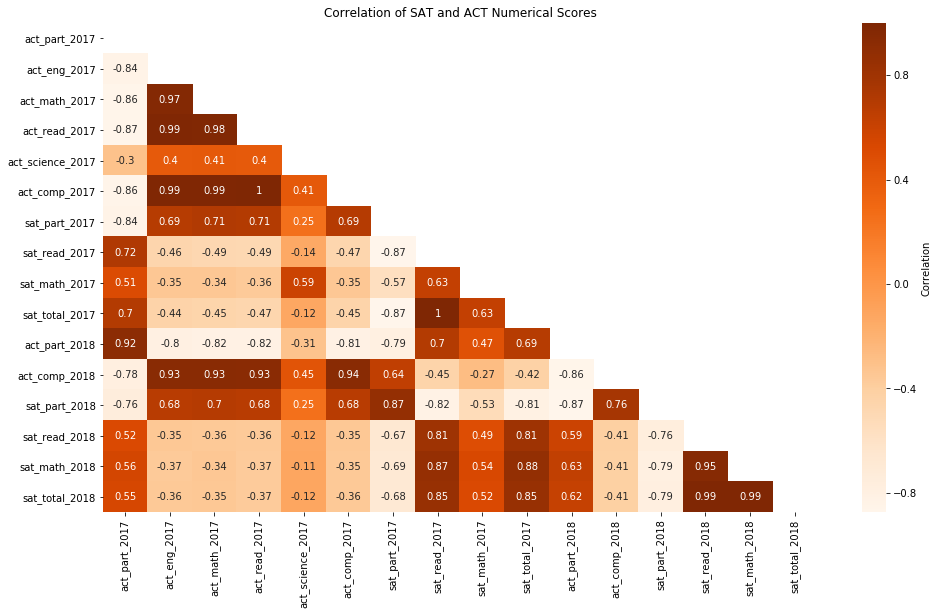

In [49]:
plt.figure(figsize = (16,9))

#Below mask code is credited to https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
mask = np.zeros(test_scores_2017_2018.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True


sns.heatmap(test_scores_2017_2018.corr(), cmap="Oranges", annot=True, cbar_kws={'label': 'Correlation'}, mask=mask);
plt.title('Correlation of SAT and ACT Numerical Scores');

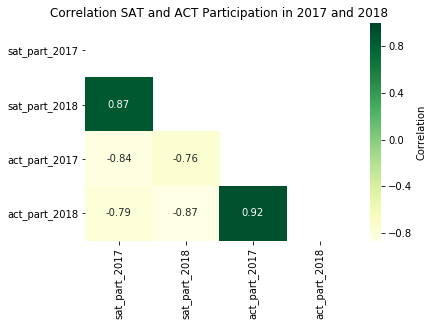

In [50]:


#Below mask code is credited to https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
mask = np.zeros(sat_act_part_2017_2018.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True


sns.heatmap(sat_act_part_2017_2018.corr(), cmap="YlGn", annot=True, cbar_kws={'label': 'Correlation'}, mask=mask);
plt.title('Correlation SAT and ACT Participation in 2017 and 2018');



The ACT participation in 2017 and ACT participation in 2018 have a positive correlation of 0.92. The heatmap also reveals that SAT participation in 2018 and ACT participation in 2018 have a negative correlation of 0.87. For 2017, it was also negative correlation of 0.84. It would be interesting to investigate why as one test participation goes up the other one goes down. 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [51]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, figsize, bins):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = figsize) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4) #making space between the graphs to make better readability
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = bins, color = 'blue', ec = 'white') # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
        ax[i].set_xlabel(list_of_xlabels[i], weight = 'bold')
        ax[i].set_title(list_of_titles[i], weight = 'bold', fontsize = 20)
        ax[i].set_ylabel(list_of_ylabels[i], weight = 'bold')
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['left'].set_visible(False)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

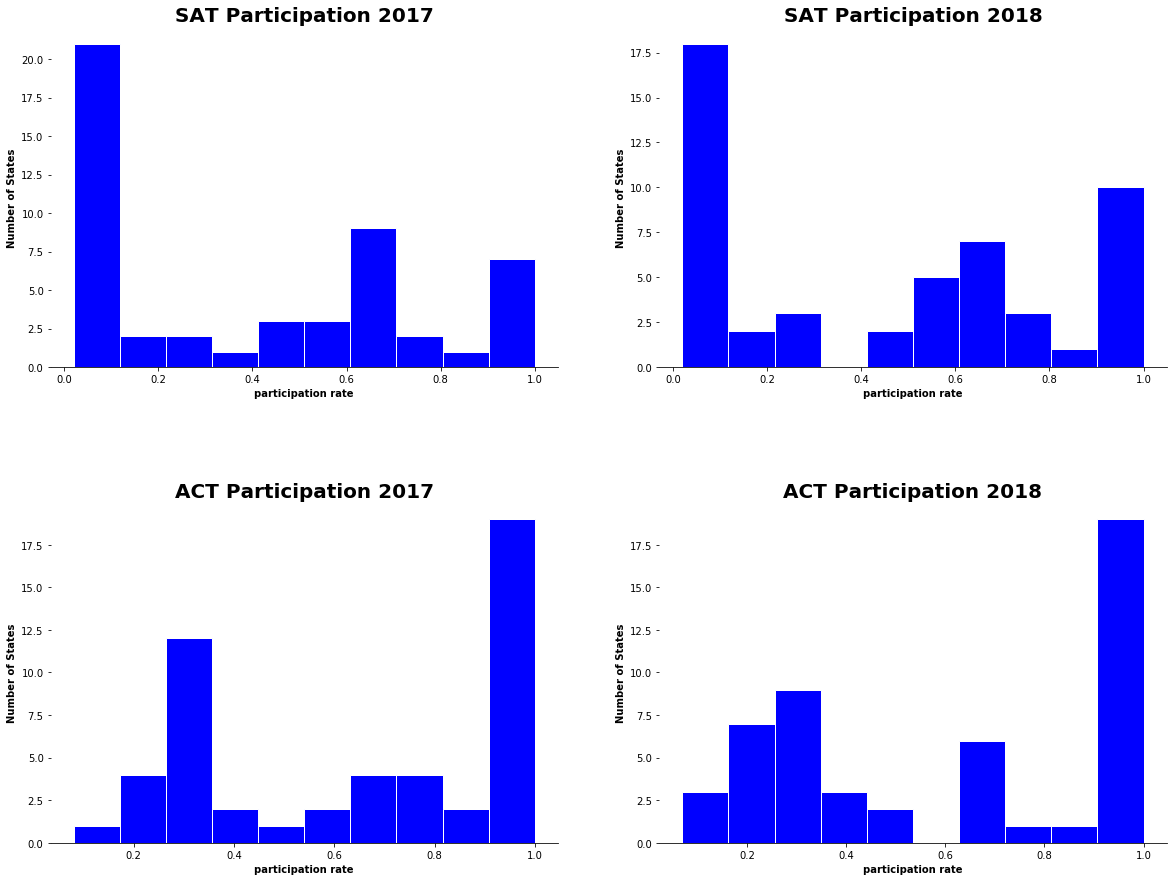

In [52]:
#Participation rates for SAT & ACT


subplot_histograms(test_scores_2017_2018, ['sat_part_2017', 'sat_part_2018', 'act_part_2017', 'act_part_2018'], 
                   ['SAT Participation 2017', 'SAT Participation 2018', 'ACT Participation 2017', 'ACT Participation 2018'],
                   ['participation rate'] * 4, ['Number of States']*4, figsize = (20,15), bins = 10)

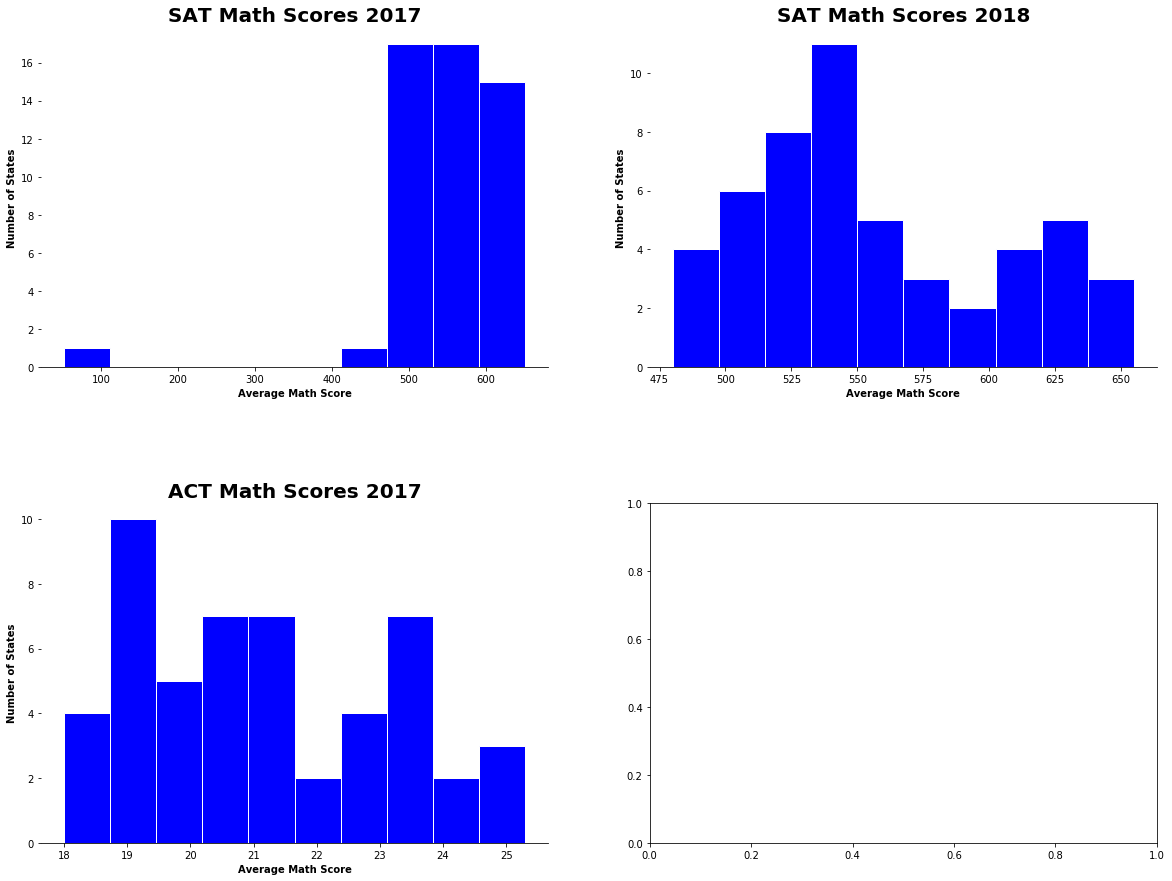

In [53]:
#Math scores for SAT & ACT


subplot_histograms(test_scores_2017_2018, ['sat_math_2017', 'sat_math_2018', 'act_math_2017'], 
                   ['SAT Math Scores 2017', 'SAT Math Scores 2018', 'ACT Math Scores 2017'],
                   ['Average Math Score'] * 3, ['Number of States']*3, figsize = (20,15), bins = 10)


It looks like there is an outlier in our SAT Math Scores for 2017. This outlier will affect our descriptive statistics for the data. Let's check it out. 

In [54]:
#Pulling the state that has such a low SAT Math Score. 

test_scores_2017_2018[test_scores_2017_2018['sat_math_2017'] < 200]

,state,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_science_2017,act_comp_2017,sat_part_2017,sat_read_2017,sat_math_2017,sat_total_2017,act_part_2018,act_comp_2018,sat_part_2018,sat_read_2018,sat_math_2018,sat_total_2018
20,Maryland,0.28,23.3,23.1,24.2,2.3,23.6,0.69,536,52,1060,0.31,22.5,0.76,545,535,1080


By examining the data, we see that Maryland Math SAT score for 2017 is 52 in the data. It is most likely an error. The SAT Total score for 2017 is 1060. The Reading score is 536. Thus the Math score should probably be set to 524.

In the future, we need to double check this information and correct the average score for Maryland. 

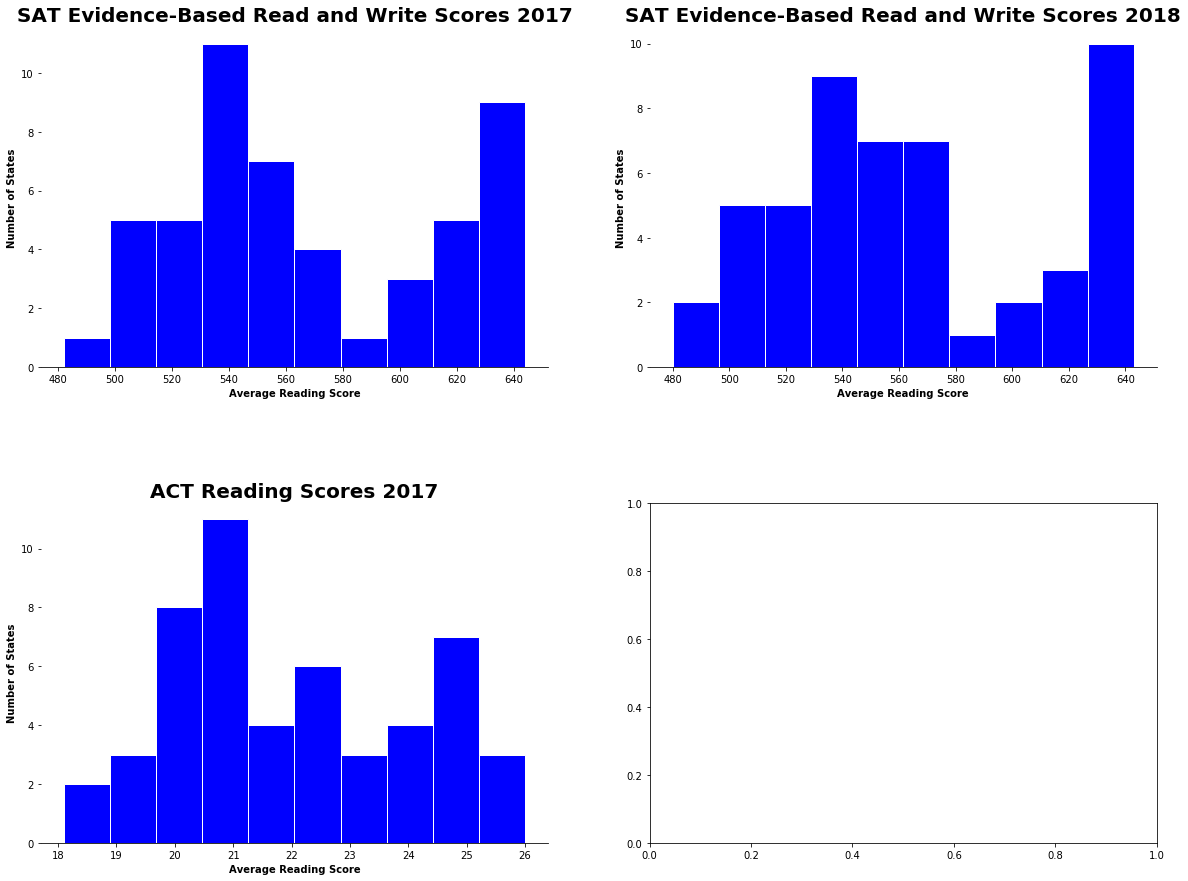

In [55]:
#Reading/verbal scores for SAT & ACT

#Math scores for SAT & ACT


subplot_histograms(test_scores_2017_2018, ['sat_read_2017', 'sat_read_2018', 'act_read_2017'], 
                   ['SAT Evidence-Based Read and Write Scores 2017', 'SAT Evidence-Based Read and Write Scores 2018', 'ACT Reading Scores 2017'],
                   ['Average Reading Score'] * 3, ['Number of States']*3, figsize = (20,15), bins = 10)


Aside from the problem with Maryland, I do not notice a significant change in participation, math or reading scores from year to year. Along with that, our 2018 ACT data doesn't have reading or math scores that we can compare our 2017 data. So, last I would like to take a look at the Total SAT scores and the ACT Composite scores. 

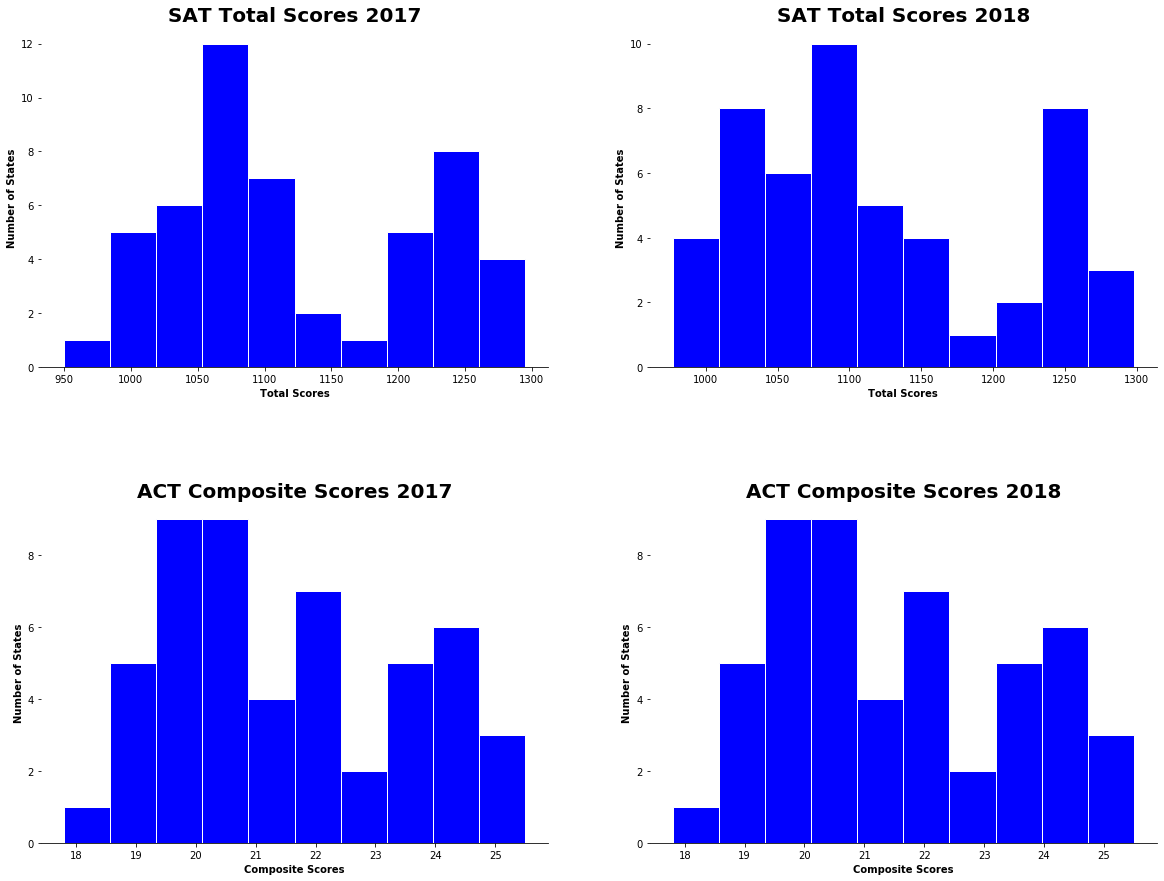

In [56]:
subplot_histograms(test_scores_2017_2018, ['sat_total_2017', 'sat_total_2018', 'act_comp_2017', 'act_comp_2017'], 
                   ['SAT Total Scores 2017', 
                    'SAT Total Scores 2018', 
                    'ACT Composite Scores 2017', 'ACT Composite Scores 2018'],
                   ['Total Scores', 'Total Scores', 'Composite Scores', 'Composite Scores'],
                   ['Number of States']*4, figsize = (20,15), bins = 10)

Even looking at histograms of Total and Composite scores, there is not a large difference that jump out. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


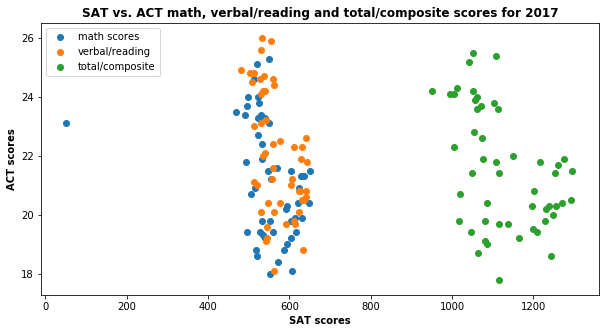

In [57]:
plt.figure(figsize = (10,5))
plt.scatter(test_scores_2017_2018['sat_math_2017'], test_scores_2017_2018['act_math_2017']);
plt.scatter(test_scores_2017_2018['sat_read_2017'], test_scores_2017_2018['act_read_2017']);
plt.scatter(test_scores_2017_2018['sat_total_2017'], test_scores_2017_2018['act_comp_2017']);
plt.title("SAT vs. ACT math, verbal/reading and total/composite scores for 2017", weight = 'bold');
plt.legend(['math scores', 'verbal/reading', 'total/composite']);
plt.xlabel('SAT scores', weight='bold');
plt.ylabel('ACT scores', weight = 'bold');



Looking at the scatter plot of SAT vs ACT scores, there doesn't seem to be a correlation between the SAT and ACT scores in 2017. 

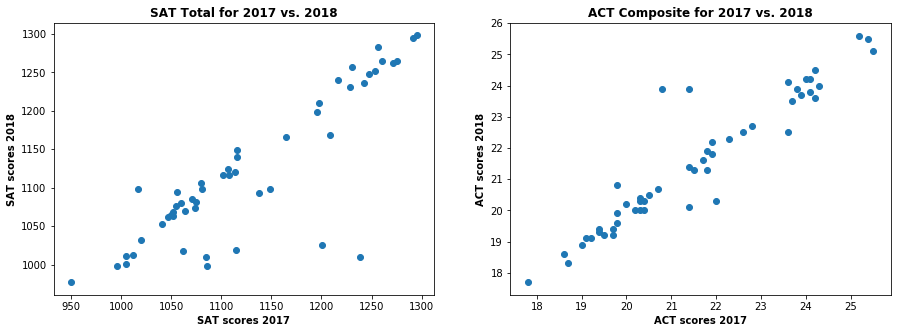

In [58]:
fix, ax = plt.subplots(1, 2, figsize = (15,5))

ax[0].scatter(test_scores_2017_2018['sat_total_2017'], test_scores_2017_2018['sat_total_2018']);
ax[1].scatter(test_scores_2017_2018['act_comp_2017'], test_scores_2017_2018['act_comp_2018'])
ax[0].set_title("SAT Total for 2017 vs. 2018", weight = 'bold');
ax[1].set_title('ACT Composite for 2017 vs. 2018', weight = 'bold')
ax[0].set_xlabel('SAT scores 2017', weight='bold');
ax[1].set_xlabel('ACT scores 2017', weight='bold');
ax[0].set_ylabel('SAT scores 2018', weight='bold');
ax[1].set_ylabel('ACT scores 2018', weight='bold');


There is definetely a positive correlation between SAT total for 2017 vs 2018 and ACT Composite for 2017 vs 2018. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

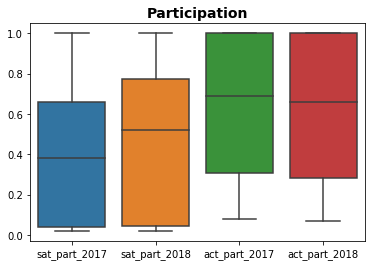

In [59]:
def multiple_boxplots(dataframe, list_of_columns, title):
    matrix_of_data = dataframe.loc[:, list_of_columns]
    sns.boxplot(data = matrix_of_data).set_title(title, weight = 'bold', fontsize = 14)
    


multiple_boxplots(test_scores_2017_2018, ['sat_part_2017', 'sat_part_2018', 'act_part_2017', 'act_part_2018'], 
                  'Participation')


It's interesting to see that the participation in ACT is on average higher than the participation in SAT. The tails of the box plot are in oposite directions. 

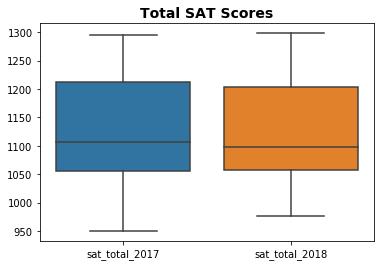

In [60]:
multiple_boxplots(test_scores_2017_2018, ['sat_total_2017', 'sat_total_2018'], 
                  'Total SAT Scores')

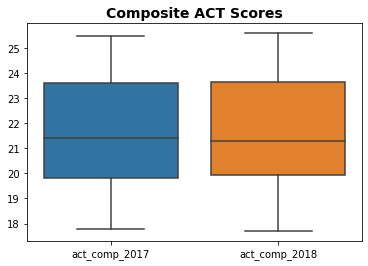

In [61]:
multiple_boxplots(test_scores_2017_2018, ['act_comp_2017', 'act_comp_2018'], 
                  'Composite ACT Scores')

Two graphs above could not be compared since the grading system for SAT and ACT is different. But looking at them separately, it sees that neigher the total SAT nor the composite ACT scores varied much from year to year. 

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

The one number I have not explored so far is the rate of change for the participation from state to state. 

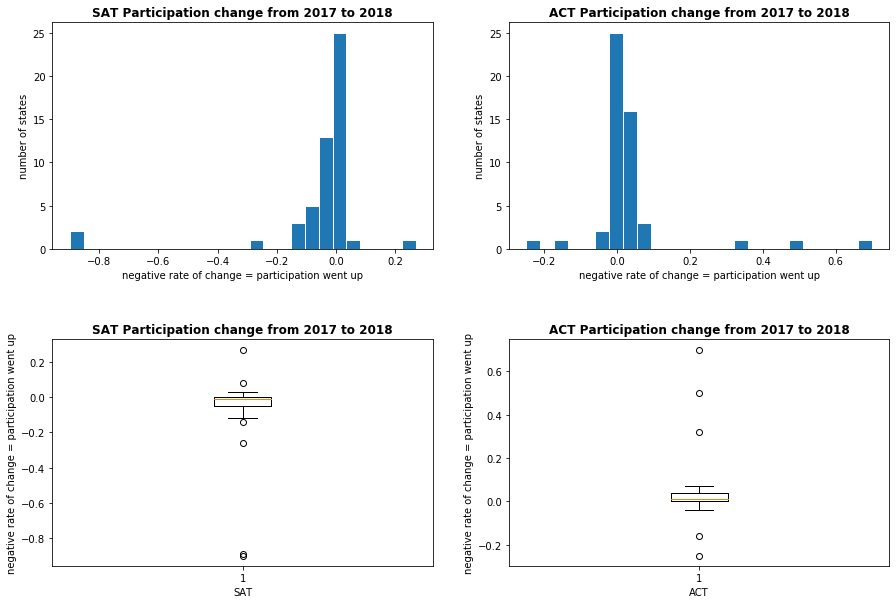

In [62]:
#Keep in mind that a negative rate of change means the participation went up
#Positive rate of change means the participation went down
fig, ax = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(hspace = 0.4)
ax[0,0].hist(sat_part_2017_2018['rate_change'], bins = 25, ec='white')
ax[0,1].hist(act_part_2017_2018['rate_change'], bins = 25, ec='white');
ax[1,0].boxplot(sat_part_2017_2018['rate_change']) ;  
ax[1,1].boxplot(act_part_2017_2018['rate_change']);
ax[0,0].set_title('SAT Participation change from 2017 to 2018', weight = 'bold')
ax[0,1].set_title('ACT Participation change from 2017 to 2018', weight = 'bold')
ax[1,0].set_title('SAT Participation change from 2017 to 2018', weight = 'bold')
ax[1,1].set_title('ACT Participation change from 2017 to 2018', weight = 'bold');
ax[0,0].set_xlabel('negative rate of change = participation went up');
ax[0,1].set_xlabel('negative rate of change = participation went up')
ax[0,0].set_ylabel('number of states');
ax[0,1].set_ylabel('number of states')
ax[1,0].set_ylabel('negative rate of change = participation went up')
ax[1,1].set_ylabel('negative rate of change = participation went up')
ax[1,0].set_xlabel('SAT')
ax[1,1].set_xlabel('ACT');

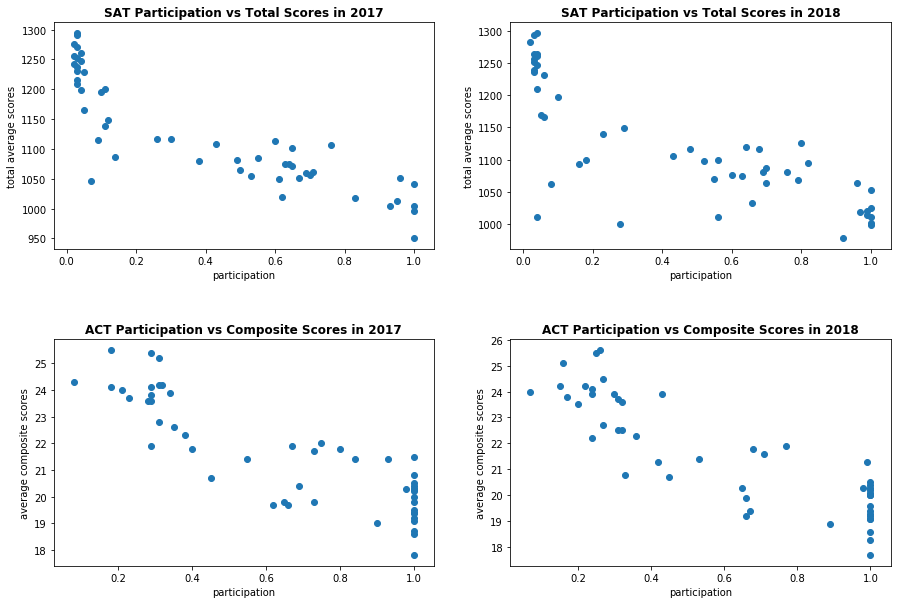

In [63]:
#Scatter plot of participation vs. total scores
fig, ax = plt.subplots(2, 2, figsize=(15,10))
plt.subplots_adjust(hspace = 0.4)
ax[0,0].scatter(test_scores_2017_2018['sat_part_2017'], test_scores_2017_2018['sat_total_2017'])
ax[0,1].scatter(test_scores_2017_2018['sat_part_2018'], test_scores_2017_2018['sat_total_2018'])
ax[1,0].scatter(test_scores_2017_2018['act_part_2017'], test_scores_2017_2018['act_comp_2017'])
ax[1,1].scatter(test_scores_2017_2018['act_part_2018'], test_scores_2017_2018['act_comp_2018'])
ax[0,0].set_title('SAT Participation vs Total Scores in 2017', weight = 'bold')
ax[0,1].set_title('SAT Participation vs Total Scores in 2018', weight = 'bold')
ax[1,0].set_title('ACT Participation vs Composite Scores in 2017', weight = 'bold')
ax[1,1].set_title('ACT Participation vs Composite Scores in 2018', weight = 'bold');
ax[0,0].set_xlabel('participation');
ax[0,1].set_xlabel('participation')
ax[0,0].set_ylabel('total average scores');
ax[0,1].set_ylabel('total average scores')
ax[1,0].set_ylabel('average composite scores')
ax[1,1].set_ylabel('average composite scores')
ax[1,0].set_xlabel('participation')
ax[1,1].set_xlabel('participation');

Interestingly there seems to be a negative correlation between the test participation and total/composite scores. This is visible roughly in both years and for both tests. It is possible that the more students take the test the more the test scores vary. Thus it will bring the average down. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

    The first state that drew my attention was the state of Maine. It has nearly 100% partipation in SAT but a very low (8% in 2017) participation in ACT. According to [edweek.com ](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html), Maine made it a requirement to take the SAT. This explains the 100% SAT participation. However, the 8% participation in Maine strikes me as awfully low. At this moment I could not find any documentation to explain this. 


The second state that interested me was Colorado. It had an 89% increase in SAT participation and a 70% decrease in ACT participation. Now we saw that SAT and ACT participation have a negative correlation in the heat map above. The drop in ACT is most likely explained by the negative correlation. The SAT participation went up, thus the ACT participation went down. However, why did the SAT participation go up in the first place? According to the following article, [testive](https://www.testive.com/colorado-sat-change-2017/), in 2016, Colorado made the SAT testing mandatory for juniors. In 2017, they would all have taken the SAT. Thus by the time they became seniors they would have already have taken the SAT and would have counted in participation. 

Now how about Florida, Georgia, Hawaii, North Carolina and South Carolina? These five states have equally high participation rates (higher than 50%) in both SAT and ACT. According the edweek.com article I already mentioned above, North Carolina and Hawaii both require mandatory ACT participation. This would account for 100% ACT participation in North Carolina but doesn't explain the 100% SAT participation in 2018. 

According to [edweek](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html),
South Carolina requires students to take either 
or SAT. The participation in both test for this state is approximately 50% for both. It seems the preference for which test to take in these tests is about the same for both tests. 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on the analysis of the data and looking in to policies the states have set, it is clear that the participation is heavily dependent on the policy of the state. 

The states that require the students to take the SAT will have a 100% participation in the test. However, that usually results in the drop in ACT participation. The states that give the option of either or, result in approximately even participation between the ACT and SAT. 

States who haven't yet made the change to mandatory test participation should look in to doing so. It is possible that one of the factors that plays in benefit to the student is the fact that the test can be taken during school hours and becomes affordable. 

It would be beneficial to study the correlation of ACT vs SAT testing with state average income. Will the income influence which test is favored? Another question we can study is correlation between participation and number of parents/number of working parents. 

Another interesting question: which test is more beneficial for the student. 

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [64]:
# Code: